<a href="https://colab.research.google.com/github/Achyuth2026/Arrays/blob/main/BTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install tensorflow

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [12]:
DATASET_PATH = "/content/drive/MyDrive/BTDtraining"

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)


Found 4041 images belonging to 4 classes.
Found 1008 images belonging to 4 classes.


In [13]:
base_model = InceptionResNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

for layer in base_model.layers:
    layer.trainable = False


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
x = base_model.output

x = Conv2D(256, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = GlobalAveragePooling2D()(x)


In [15]:
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [16]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 58,206,564 (222.04 MB)

 Trainable params: 3,869,060 (14.76 MB)

 Non-trainable params: 54,337,504 (207.28 MB)

In [18]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)


Epoch 1/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 735ms/step - accuracy: 0.8434 - loss: 0.4378 - val_accuracy: 0.7153 - val_loss: 0.8896
Epoch 2/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 84s 658ms/step - accuracy: 0.8730 - loss: 0.3666 - val_accuracy: 0.7143 - val_loss: 0.8759
Epoch 3/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 85s 670ms/step - accuracy: 0.8841 - loss: 0.3235 - val_accuracy: 0.7460 - val_loss: 0.7776
Epoch 4/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 89s 701ms/step - accuracy: 0.9077 - loss: 0.2432 - val_accuracy: 0.7659 - val_loss: 0.7279
Epoch 5/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 88s 694ms/step - accuracy: 0.9120 - loss: 0.2352 - val_accuracy: 0.7401 - val_loss: 0.9009
Epoch 6/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - accuracy: 0.9272 - loss: 0.2043 - val_accuracy: 0.7579 - val_loss: 0.8078
Epoch 7/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 98s 768ms/step - accuracy: 0.9227 - loss: 0.2186 - val_accuracy: 0.7550 - val_loss: 0.8529
Epoch 8/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 96s 756ms/step - accuracy: 0.9417 - loss: 0

In [19]:
for layer in base_model.layers[-50:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.8841 - loss: 0.3183 - val_accuracy: 0.7907 - val_loss: 0.7176
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 95s 749ms/step - accuracy: 0.9258 - loss: 0.2012 - val_accuracy: 0.7817 - val_loss: 0.7522
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 733ms/step - accuracy: 0.9404 - loss: 0.1607 - val_accuracy: 0.7937 - val_loss: 0.7503
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 731ms/step - accuracy: 0.9504 - loss: 0.1393 - val_accuracy: 0.7956 - val_loss: 0.7390
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 732ms/step - accuracy: 0.9487 - loss: 0.1418 - val_accuracy: 0.8036 - val_loss: 0.7295
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 89s 703ms/step - accuracy: 0.9564 - loss: 0.1281 - val_accuracy: 0.8135 - val_loss: 0.7332
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 89s 702ms/step - accuracy: 0.9591 - loss: 0.1039 - val_accuracy: 0.8046 - val_loss: 0.7555
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 87s 691ms/step - accuracy: 0.9652 - loss: 0.0

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TEST_PATH = "/content/drive/MyDrive/BTDtraining"

IMG_SIZE = 224
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'
)


Found 5049 images belonging to 4 classes.


In [36]:
loss, acc = model.evaluate(test_gen)
print("Test Accuracy:", acc * 100)


158/158 ━━━━━━━━━━━━━━━━━━━━ 28s 173ms/step - accuracy: 0.9444 - loss: 0.1869
Test Accuracy: 95.22677659988403


In [37]:
import numpy as np

pred_probs = model.predict(test_gen)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes


158/158 ━━━━━━━━━━━━━━━━━━━━ 52s 251ms/step


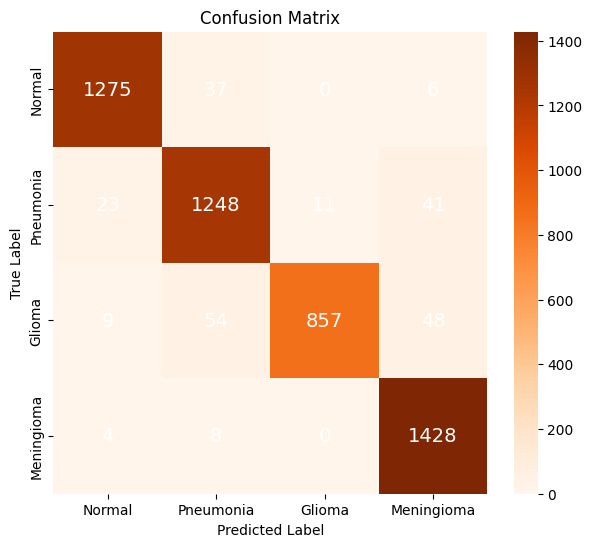

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Your class labels (must match model output order)
class_names = ["Normal", "Pneumonia", "Glioma", "Meningioma"]

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Oranges",
    annot_kws={"color":"white", "size":14},
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


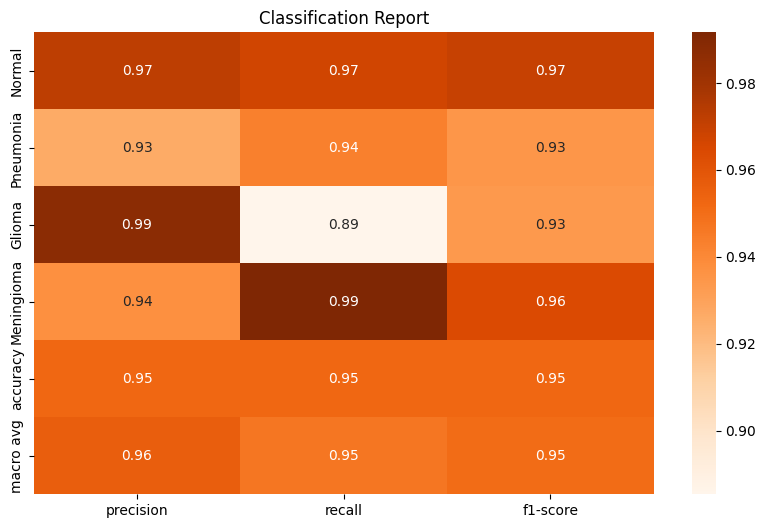

In [43]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use your class names
class_names = ["Normal", "Pneumonia", "Glioma", "Meningioma"]

# Convert report to dataframe
report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)

df = pd.DataFrame(report).transpose()

# Plot colored table
plt.figure(figsize=(10,6))
sns.heatmap(
    df.iloc[:-1, :-1],  # remove accuracy/support summary
    annot=True,
    cmap="Oranges",
    fmt=".2f"
)

plt.title("Classification Report")
plt.show()


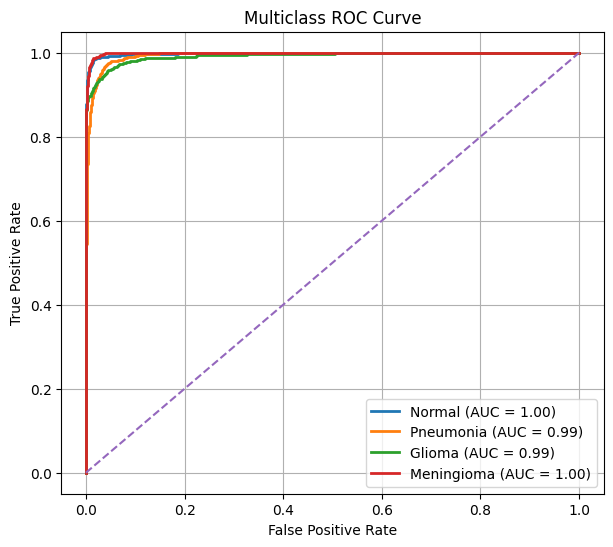

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Your class names
class_names = ["Normal", "Pneumonia", "Glioma", "Meningioma"]

# Convert true labels to binary matrix
y_true_bin = label_binarize(y_true, classes=[0,1,2,3])

plt.figure(figsize=(7,6))

for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2,
             label=f"{class_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
